<img src="masthead_construction.jpg" style="height:300px">


_________________________



 <h1 align="center">Concrete Strength</h1> 
 
 <h5 align="center">Notebook is inserted as appendix along with an appendix of target transformation and gridsearch</h5> 
 

_________________________

_________________________

_________________________

_________________________

_________________________

_________________________

_________________________

_________________________________

# Section 1: Data; Description, attributes, EDA, cleaning and engineering

1. Section describing data and summary of its attributes
 + summary of EDA and cleaning + feature engineering 
 ___________
 
### I will be using an UCI Machine Learning Repository called 'Concrete Compressive Strength Data Set' found on: https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/


####  Shape of data: The data consists of 1030 rows and 9 columns. This meaning 8 different components and the last column being the strength measure of concrete, which is the target value.This is measured in MPa (Megapascals.) All components are measured in kg in m^3 mixture, except for age, which is measured in days. These are the components:

* Cement (kg in a m^3 mixture)
* Blast Furnace Slag (kg in a m^3 mixture)
* Fly Ash (kg in a m^3 mixture)
* Water (kg in a m^3 mixture)
* Superplasticizer (kg in a m^3 mixture)
* Coarse Aggregate (kg in a m^3 mixture)
* Fine Aggregate (kg in a m^3 mixture)
* Age (day)
* Concrete compressive strength(MPa, megapascals)


#### Missing data: I was fortunate enough that there were no missing data in my dataset. 

#### Data types: All measures except for age was of float64 datatype with age being of int64 datatype. 

#### Data cleaning: As the data had no missing values and ready to be worked on, I chose to rename the columns to merely the start of the name, so I could handle those easier during my analysis.

#### Feature engineering: I scaled the data with standard scaler and considered also to transform the target variable. In the end, I chose not to do this, as I felt it made it unneccesarily complex. (My work on it can be seen in appendix: B). I did, however, add polynomial features, as it turned out these made an immense shift in R^2 for the predictions.

In [210]:
# Data wrangling
import pandas as pd
import numpy as np
import re

# Read data
data = pd.read_excel("Concrete_Data.xls")

# Display it
display(data)
print("")
display(data.info())

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


None

In [211]:
# Renaming
for column in data.columns:
    regex = r"[a-zA-Z ]+"
    new_name = re.findall(regex, column)[0]
    data = data.rename(columns={column:new_name})
    
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [212]:
y_col = 'Concrete compressive strength'

X = data.drop(y_col, axis=1)
y = data[y_col]

_________________________

_________________________________

# Section 2: Main objectives of analysis + Prediction vs interpretability 
 
2. Paragraph detailing main objectives of analysis + focusing on prediction vs interpretability 

__________________

#### The imaginary scenario was set as if I was asked to derive insights to which components would increase the strength of concrete. It was not a task of getting the most precise prediction, but a balance between prediction and interpretability. 

#### The main objective was to find a regression model to predict concrete strength, as a way of creating a quick overview, before going into more hardcore math, and also figuring out how the different components affect the strength.

#### Therefore, I prefer lasso to ridge regression, as this will zero out more variables, making for more interpretability, but still fitting the regression with polynomial features as they improved the model immensely. 


_________________________________

# Section 3: Linear regression 

3. Section with variation of linear regression model plus which is most suitable 
 + Use a simple, baseline linear regression, then add:
 + polynomial effects
 + regularization regression 
 ! All use same train-test split and 
 
 __________________________
 
 #### Firstly, I fitted a simple, baseline linear regression 
 #### Afterwards, I added ridge and lasso regularization. In appendix C, it can be seen how I used gridsearch to find the most appropriate alphas for the regularization. 
 #### Then, I added polynomial features and fitted a version of linear, ridge and lasso with and without it each. 
 #### Notice also, they all use the same train-test split. 

In [230]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create instance of standard scaler and fit_transform
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# Scale X_train 
X_train_ss = ss.fit_transform(X_train)

# Scale X_test
X_test_ss = ss.fit_transform(X_test)

# Creating object of the polynomial features class from sklearn
from sklearn.preprocessing import PolynomialFeatures 

pf = PolynomialFeatures(degree = 2)

# Create features 
X_poly_train = pf.fit_transform(X_train_ss)
X_poly_test = pf.fit_transform(X_test_ss)

# Creating object of the linear regression class from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso 

# LINEAR REGRESSION
lr = LinearRegression()
# Fitting to linear regression 
lr = lr.fit(X_train, y_train)
# Predicting 
y_pred = lr.predict(X_test)

# LINEAR REGRESSION with polynomial features 
lr_poly = LinearRegression()
# Fitting to linear regression
lr_poly = lr_poly.fit(X_poly_train, y_train)
# Predicting 
y_pred_poly = lr_poly.predict(X_poly_test)

# RIDGE REGRESSION
rr = Ridge(alpha=14000, max_iter=100000)
# Fitting to ridge regression
rr = rr.fit(X_train, y_train)
# Predicting 
y_pred_rr = rr.predict(X_test)

# RIDGE REGRESSION with polynomial features 
rr_poly = Ridge(alpha=0.005, max_iter=1000000)
# Fitting to ridge regression
rr_poly = rr_poly.fit(X_poly_train, y_train)
# Predicting 
y_pred_rr_poly = rr_poly.predict(X_poly_test)

# LASSO REGRESSION 
lassor = Lasso(alpha=1e-06)
# Fitting to lasso regression
lassor = lassor.fit(X_train, y_train)
# Predicting 
y_pred_lassor = lassor.predict(X_test)

# LASSO REGRESSION with polynomial features
lassor_poly = Lasso(alpha=0.5)
# Fitting to lasso regression
lassor_poly = lassor_poly.fit(X_poly_train, y_train)
# Predicting 
y_pred_lassor_poly = lassor_poly.predict(X_poly_test)

_________________________________

# Section 4: Findings 

4. Section with clear findings related to the main objective 
 + Which regression was the best 
 + Drives of model and insights 
 _____________________
 
 #### As seen, ridge regression with polynomial features gives the best result. This makes sense from a technical perspective, as lasso regression tend to zero out more values providing a more interpretable model. For the better predicting model, ridge is chosen.
 
 #### In the last code section, I look at the coefficients of the fitted linear regression. Here is the meaning:
 
##### For every one more kilogram in m^3 mixture:
 - Cement increases strength by 0.11 MPa
 - Blast Furnace Slag increases strength by 0.10 MPa
 - Fly Ash increases strength by 0.08 MPa
 - Water decreases strength by 0.15 MPa
 - Superplasticizer increases strength by 0.37 MPa
 - Coarse Aggregate increases strength by 0.02 MPa
 - Fine Aggregate increases strength by 0.02 MPa

##### And for every day:
- Age increases strength by 0.11 MPa

In [231]:
# Look at performance
from scipy.special import inv_boxcox
from sklearn.metrics import r2_score

#R^2 score linear regression
print('Linear regression:', r2_score(y_test, y_pred))

#R^2 score linear regression with polynomial features
print('Linear regression (Poly):', r2_score(y_test, y_pred_poly))

#R^2 score ridge regression
print('Ridge regression:', r2_score(y_test, y_pred_rr))

#R^2 score ridge regression with polynomial features 
print('Ridge regression (Poly):', r2_score(y_test, y_pred_rr_poly))

#R^2 score lasso regression
print('Lasso regression:', r2_score(y_test, y_pred_lassor))

#R^2 score lasso regression with polynomial features 
print('Lasso regression (Poly):', r2_score(y_test, y_pred_lassor_poly))

Linear regression: 0.6398800792210131
Linear regression (Poly): 0.8121735150287498
Ridge regression: 0.6422783680202114
Ridge regression (Poly): 0.8122177068711189
Lasso regression: 0.6398800804641278
Lasso regression (Poly): 0.7714894613123924


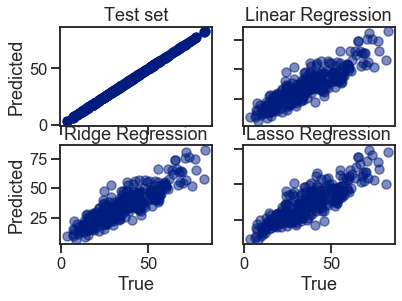

In [224]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Setting style
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

fig, axs = plt.subplots(2,2)

# 1st axis
axs[0,0].scatter(y_test,y_test)
axs[0,0].set_title('Test set')

# 2nd axis
axs[0,1].scatter(y_test,y_pred_poly, alpha =.5)
axs[0,1].set_title('Linear Regression')

# 3rd axis
axs[1,0].scatter(y_test,y_pred_rr_poly, alpha =.5)
axs[1,0].set_title('Ridge Regression')

# 4th axis
axs[1,1].scatter(y_test,y_pred_lassor_poly, alpha = .5)
axs[1,1].set_title('Lasso Regression')

for ax in axs.flat:
    ax.set(xlabel='True', ylabel='Predicted')
    
for ax in axs.flat:
    ax.label_outer()

In [232]:
# Coefficients

lr.coef_.ravel()

array([ 0.1128572 ,  0.10082768,  0.07977852, -0.14613997,  0.37195884,
        0.01794162,  0.02008256,  0.11418742])

_________________________________

# Section 5: Possible flaws and plan to revisit 

5. Highlight possible flaws with model and a plan to revisit the analysis with other methods 
___________________________

#### It would be nice to also look at the coefficients for the polynomial features and interactions. Also, it would be nice to do target transformation, if I were to spend more time on it. I have not looked at ElasticNet, something which could have been exciting, along with Stocastic Gradient Descent, but I anticipate that we will be going into more detail with SGD in a later part of the IBM course.

# Thank you for reading

_________________________________

# Appendix A: Workbook

### PREPARING DATA - Importing and reading

#### Library imports

In [91]:
# Data wrangling
import pandas as pd
import numpy as np
import re

#Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Transformning target 
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox 
from scipy.special import inv_boxcox

#### Reading data

In [92]:
# Read data
data = pd.read_excel("Concrete_Data.xls")

# Display it
display(data)
print("")
display(data.info())
print('\n As all rows are filled with non-null values, it is asumed to be clean')

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


None


 As all rows are filled with non-null values, it is asumed to be clean


#####  I chose to rename the columns to something simpler, so I could better work with it. When I derive insight, I will revist the specified units

In [93]:
# Renaming
for column in data.columns:
    regex = r"[a-zA-Z ]+"
    new_name = re.findall(regex, column)[0]
    data = data.rename(columns={column:new_name})
    
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


___________________________________________

### PREPARING DATA - Feature engineering (Transforming target, train/test split, check for skewness, OHC, scaling)

#### X and y

In [94]:
y_col = 'Concrete compressive strength'

X = data.drop(y_col, axis=1)
y = data[y_col]

#### Note, as there is no categorical value, OHC is not applied anywhere

#### Split to train and test set

In [95]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#### Scale the features

In [96]:
# Create instance of standard scaler and fit_transform
from sklearn.preprocessing import StandardScaler

# Scale X_train 
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)

# Scale X_test
X_test_ss = ss.fit_transform(X_test)

___________________________________________

### FITTING DATA AND PREDICTING - Regression

#### Polynomial features 

In [101]:
# Creating object of the polynomial features class from sklearn
from sklearn.preprocessing import PolynomialFeatures 


pf = PolynomialFeatures(degree = 2)

# Create features 
X_poly_train = pf.fit_transform(X_train_ss)
X_poly_test = pf.fit_transform(X_test_ss)

#### Regression

In [189]:
# Creating object of the linear regression class from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso 

# LINEAR REGRESSION
lr = LinearRegression()
# Fitting to linear regression 
lr = lr.fit(X_train, y_train)
# Predicting 
y_pred = lr.predict(X_test)

# LINEAR REGRESSION with polynomial features 
lr_poly = LinearRegression()
# Fitting to linear regression
lr_poly = lr_poly.fit(X_poly_train, y_train)
# Predicting 
y_pred_poly = lr_poly.predict(X_poly_test)

# RIDGE REGRESSION
rr = Ridge(alpha=14000, max_iter=100000)
# Fitting to ridge regression
rr = rr.fit(X_train, y_train)
# Predicting 
y_pred_rr = rr.predict(X_test)

# RIDGE REGRESSION with polynomial features 
rr_poly = Ridge(alpha=0.005, max_iter=1000000)
# Fitting to ridge regression
rr_poly = rr_poly.fit(X_poly_train, y_train)
# Predicting 
y_pred_rr_poly = rr_poly.predict(X_poly_test)

# LASSO REGRESSION 
lassor = Lasso(alpha=1e-06)
# Fitting to lasso regression
lassor = lassor.fit(X_train, y_train)
# Predicting 
y_pred_lassor = lassor.predict(X_test)

# LASSO REGRESSION with polynomial features
lassor_poly = Lasso(alpha=0.5)
# Fitting to lasso regression
lassor_poly = lassor_poly.fit(X_poly_train, y_train)
# Predicting 
y_pred_lassor_poly = lassor_poly.predict(X_poly_test)

# Performance

#### R^2 

In [191]:
# Look at performance
from scipy.special import inv_boxcox
from sklearn.metrics import r2_score

#R^2 score linear regression
print('Linear regression:', r2_score(y_test, y_pred))

#R^2 score linear regression with polynomial features
print('Linear regression (Poly):', r2_score(y_test, y_pred_poly))

#R^2 score ridge regression
print('Ridge regression:', r2_score(y_test, y_pred_rr))

#R^2 score ridge regression with polynomial features 
print('Ridge regression (Poly):', r2_score(y_test, y_pred_rr_poly))

#R^2 score lasso regression
print('Lasso regression:', r2_score(y_test, y_pred_lassor))

#R^2 score lasso regression with polynomial features 
print('Lasso regression (Poly):', r2_score(y_test, y_pred_lassor_poly))

Linear regression: 0.64450619844878
Linear regression (Poly): 0.7762023744548977
Ridge regression: 0.6433552229336146
Ridge regression (Poly): 0.776197232287082
Lasso regression: 0.644506197642225
Lasso regression (Poly): 0.7477048986767247


#### Visually 

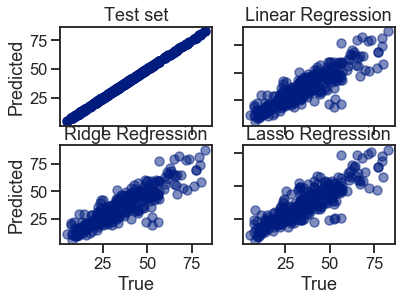

In [193]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Setting style
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

fig, axs = plt.subplots(2,2)

# 1st axis
axs[0,0].scatter(y_test,y_test)
axs[0,0].set_title('Test set')

# 2nd axis
axs[0,1].scatter(y_test,y_pred_poly, alpha =.5)
axs[0,1].set_title('Linear Regression')

# 3rd axis
axs[1,0].scatter(y_test,y_pred_rr_poly, alpha =.5)
axs[1,0].set_title('Ridge Regression')

# 4th axis
axs[1,1].scatter(y_test,y_pred_lassor_poly, alpha = .5)
axs[1,1].set_title('Lasso Regression')

for ax in axs.flat:
    ax.set(xlabel='True', ylabel='Predicted')
    
for ax in axs.flat:
    ax.label_outer()

# Derive insights

In [114]:
# Coefficients

lr.coef_.ravel()

array([ 0.11484893,  0.09813222,  0.07978504, -0.18566823,  0.25586389,
        0.01793223,  0.01851238,  0.10481691])

_______________________________

# Appendix B: Transformation of target variable


No transformation
P-value: 4.9409594191780554e-08

Log transformation
P-value: 5.0972800397373625e-26

Sqrt transformation
P-value: 0.00022351406346099572

Box Cox transformation
P-value: 0.00020366380084204495


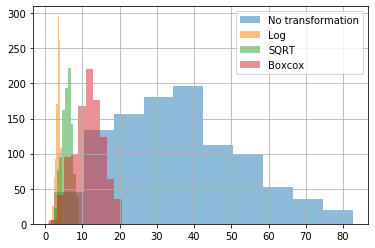

In [22]:
# Normal distributed y?
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

data['Concrete compressive strength'].hist(label ='No transformation', alpha = 0.5);

print("\nNo transformation")
print("P-value:", normaltest(data['Concrete compressive strength'].values)[1])

#Log transformation

log_concrete = np.log(data['Concrete compressive strength'])
log_concrete.hist(label = 'Log', alpha = 0.5)

print("\nLog transformation")
print("P-value:", normaltest(log_concrete)[1])

# SQRT transformation
sqrt_concrete = np.sqrt(data['Concrete compressive strength'])
sqrt_concrete.hist(label='SQRT', alpha = 0.5)

print("\nSqrt transformation")
print("P-value:", normaltest(sqrt_concrete)[1])

# Box cox 
from scipy.stats import boxcox

bc_transformation_concrete = boxcox(data['Concrete compressive strength'])
bc_transformation_result = bc_transformation_concrete[0]

plt.hist(bc_transformation_result, label='Boxcox', alpha = 0.5)

print("\nBox Cox transformation")
print("P-value:", normaltest(bc_transformation_result)[1])

plt.legend()

In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# X and y
y_col = 'Concrete compressive strength'

X = data.drop(y_col, axis=1)
y = data[y_col]

# Creating Polynomial features 
from sklearn.preprocessing import PolynomialFeatures

#Polynomial feature object with a degree of 2, do not inlude bias as this will be added by other class 
pf_boxcox = PolynomialFeatures(degree=2, include_bias=False)
X_pf_boxcox = pf_boxcox.fit_transform(X)

# Train test split
from sklearn.model_selection import train_test_split

X_train_boxcox, X_test_boxcox, y_train_boxcox, y_test_boxcox = train_test_split(X_pf_boxcox, y, test_size = 0.3)

# Create instance of standard scaler and fit_transform
# Scale X_train 
ss_boxcox = StandardScaler()
X_train_ss_boxcox = ss_boxcox.fit_transform(X_train_boxcox)

# Transforming with desired transformation 
# Box cox 
from scipy.stats import boxcox

boxcox_result = boxcox(y_train_boxcox)
y_train_boxcox_trans = boxcox_result[0]
lambda_value = boxcox_result[1]

# Transforming the X_test
X_test_ss_boxcox = ss_boxcox.transform(X_test_boxcox)

# Creating object of the linear regression class from sklearn
lr_boxcox = LinearRegression()
# Fitting the transformed train set
lr_boxcox = lr_boxcox.fit(X_train_ss_boxcox, y_train_boxcox_trans)
# Predicting 
y_pred_boxcox = lr_boxcox.predict(X_test_ss_boxcox)

# Inverse transformation
from scipy.special import inv_boxcox

# Look at performance
from sklearn.metrics import r2_score

y_pred_inv_tran_boxcox = inv_boxcox(y_pred_boxcox, lambda_value)
print('With boxcox, R^2:', r2_score(y_pred_inv_tran_boxcox, y_test_boxcox))

#____________________________________________________________________
# Without boxcox 
lr_no_boxcox = LinearRegression()
lr_no_boxcox = lr_no_boxcox.fit(X_train_ss, y_train)
lr_pred_no_boxcox = lr_no_boxcox.predict(X_test_ss)

print('Without boxcox, R^2:', r2_score(lr_pred_no_boxcox, y_test))

With boxcox, R^2: 0.709945495597597
Without boxcox, R^2: 0.45228592446836224


__________________________

# Appendix C: Gridsearch

#### Import data again

In [135]:
# Read data
data = pd.read_excel("Concrete_Data.xls")

# Renaming
for column in data.columns:
    regex = r"[a-zA-Z ]+"
    new_name = re.findall(regex, column)[0].strip()
    data = data.rename(columns={column:new_name})
    
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


#### Split to train and test set 

In [136]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

#### Poly features 

In [183]:
# Creating object of the polynomial features class from sklearn
from sklearn.preprocessing import PolynomialFeatures 

pf = PolynomialFeatures(degree = 2)

# Create features 
X_poly_train = pf.fit_transform(X_train_ss)
X_poly_test = pf.fit_transform(X_test_ss)

#### RMSE

In [184]:
# Setting up a function to calculate root mean squared error from mean squared error 

# Import 
from sklearn.metrics import mean_squared_error

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

# Using rmse 
linear_regression = LinearRegression()
linear_regression = linear_regression.fit(X_train, y_train)
linear_regression_rmse = rmse(y_test, linear_regression.predict(X_test))

#### GridsearchCV, Ridge

In [185]:
from sklearn.linear_model import RidgeCV

# Define alphas to try out
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80, 100, 200, 5000, 10000, 13000, 14000, 15000, 16000, 17500, 20000] 

# Create ridgecv object
ridgeCV = RidgeCV(alphas=alphas, cv=4).fit(X_poly_train, y_train)

# Use the rmse function to calculate
ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_poly_test))

print("Chosen alpha: ", ridgeCV.alpha_, '\nRMSE for the chosen alpha: ', ridgeCV_rmse)

Chosen alpha:  0.005 
RMSE for the chosen alpha:  7.834212543610577


#### GridsearchCV, lasso

In [186]:
from sklearn.linear_model import LassoCV

# Define alphas to try out 
alphas2 = np.array([1e-6, 5e-5, 1e-5, 5e-5, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1])

# Create lassocv object
lassoCV = LassoCV(alphas=alphas2, max_iter=5e4, cv=3).fit(X_poly_train, y_train)

# Use the rmse function to calculate
lassoCV_rmse = rmse(y_test, lassoCV.predict(X_poly_test))

print("Chosen alpha: ", lassoCV.alpha_, '\nRMSE for the chosen alpha: ', lassoCV_rmse)

Chosen alpha:  1e-06 
RMSE for the chosen alpha:  7.8341305778245


#### Elasticnet

In [187]:
from sklearn.linear_model import ElasticNetCV

# Define alphas to try out 
l1_ratios = np.linspace(0.1, 0.9, 9)

# Create Elasticnetcv object
elasticNetCV = ElasticNetCV(alphas = alphas2, l1_ratio = l1_ratios, max_iter=5e4).fit(X_poly_train, y_train)

# Use rsme function to calculate 
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_poly_test))

print("Chosen alpha: ", elasticNetCV.alpha_, '\nChosen ratio', elasticNetCV.l1_ratio_, '\nRMSE for the chosen alpha: ', elasticNetCV_rmse)


C:\Users\brosb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Chosen alpha:  1e-06 
Chosen ratio 0.9 
RMSE for the chosen alpha:  7.834131080965422


__________________________

# Appendix D: Correlation

#### Import data again

In [14]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Read data
data = pd.read_excel("Concrete_Data.xls")

# Renaming
for column in data.columns:
    regex = r"[a-zA-Z ]+"
    new_name = re.findall(regex, column)[0].strip()
    data = data.rename(columns={column:new_name})
    
data.head();

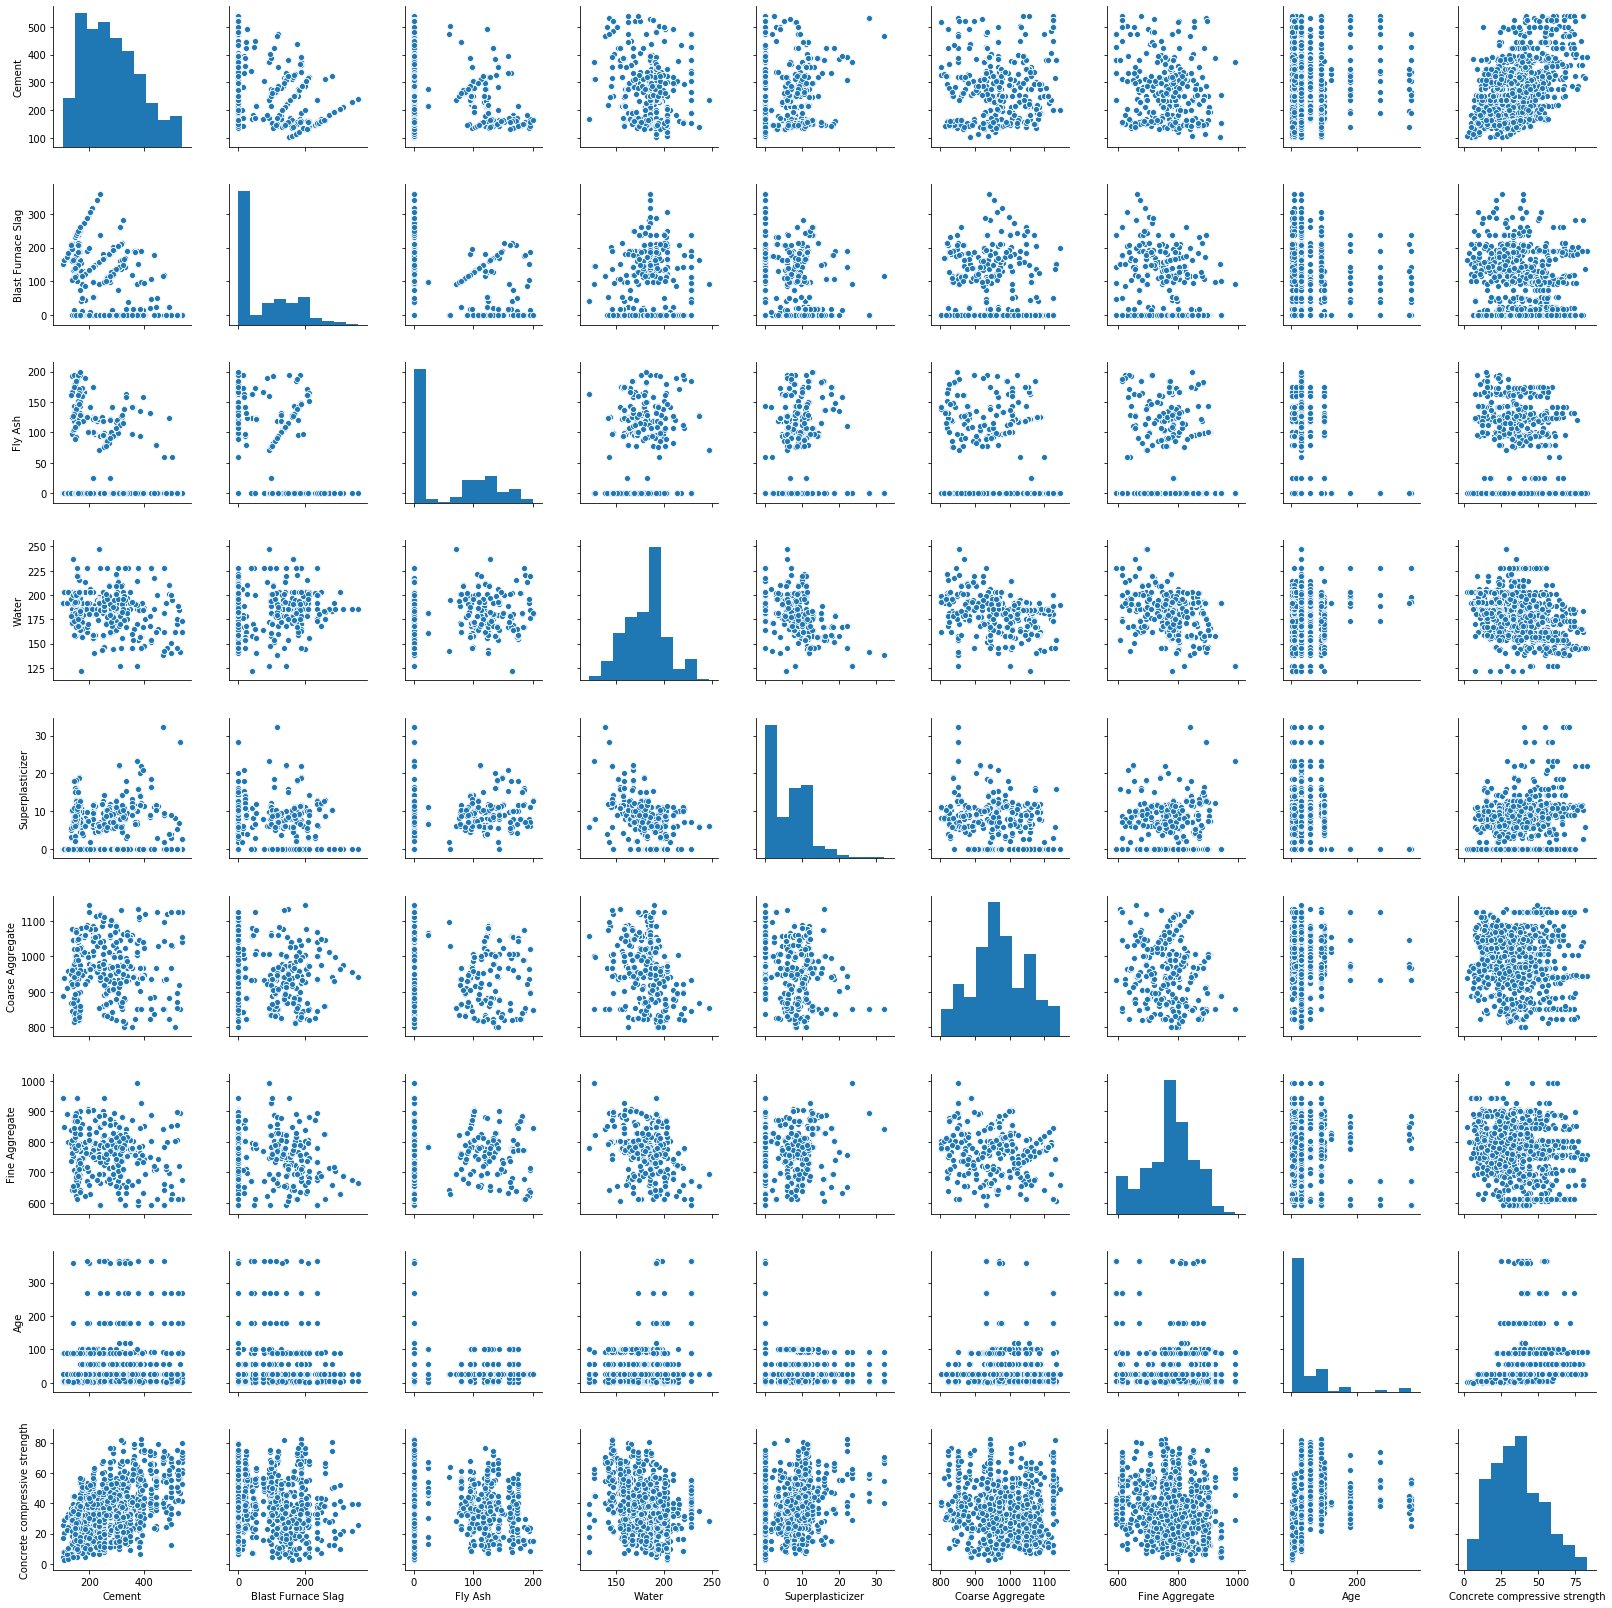

In [15]:
sns.pairplot(data)